In [1]:
#importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv("Fish.csv")
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#changing values of species using labelencoding

label_encoder = LabelEncoder()
df['Species'] =label_encoder.fit_transform(df["Species"])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int64

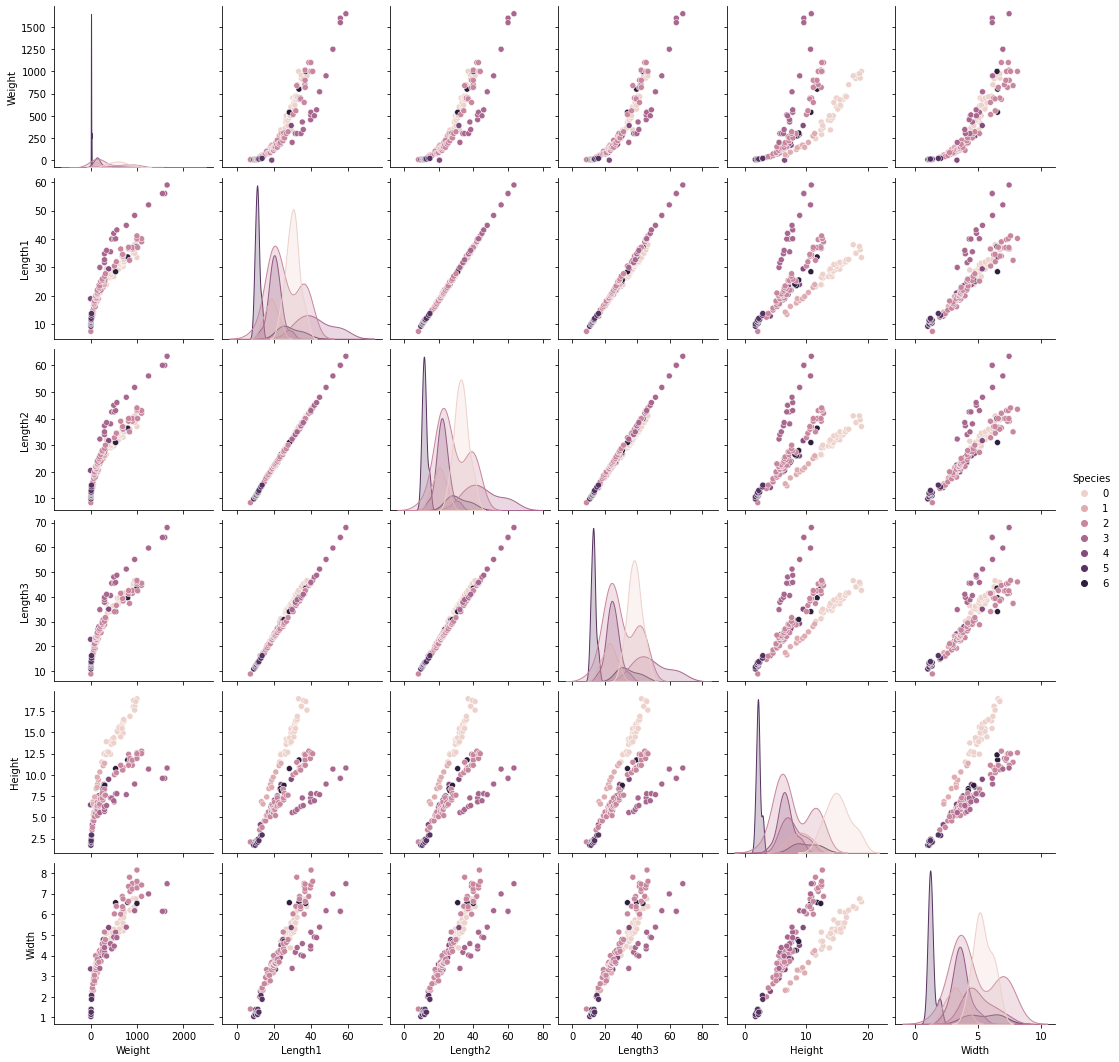

In [6]:
#using scatter plot
import seaborn as sns
sns.pairplot(df,hue='Species')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


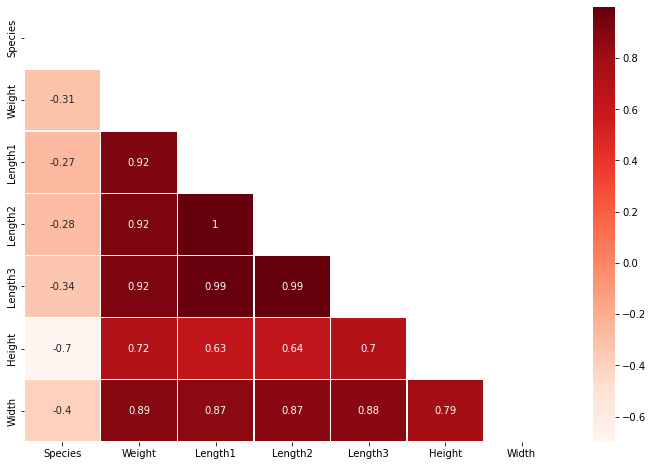

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)


In [8]:
# Using Logistic Regression

from sklearn.model_selection import train_test_split

X = df.drop(['Species'], axis = 1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [9]:
# Initiatlize the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

print (y_pred_test)
# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

[2 4 2 5 3 3 5 1 2 2 5 0 2 4 4 4 5 2 0 5 0 2 0 2 5 1 2 2 0 0 3 2 3 3 0 2 2
 2 2 2 2 2 1 2 2 2 3 2]
Model accuracy score: 93.75%


In [10]:
# Create a Pickle file  
import pickle
pickle_out = open("classifier_fish.pkl","wb")
pickle.dump(logreg, pickle_out, fix_imports=True )
pickle_out.close()